# DSC510_Team_Project: Visualization

## Load preprocessed data

In [1]:
import pandas as pd
preprossed_data_df = pd.read_csv('visualization_data_df.csv')
preprossed_data_df=preprossed_data_df[0:6238] # Get only the training data

In [2]:
preprossed_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6238 entries, 0 to 6237
Data columns (total 39 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Reviews       6238 non-null   float64
 1   Ratings       6238 non-null   int64  
 2   Genre         6238 non-null   object 
 3   BookCategory  6238 non-null   object 
 4   Price         6237 non-null   float64
 5   Set           6238 non-null   object 
 6   Authors       6238 non-null   object 
 7   No. Authors   6238 non-null   int64  
 8   Print         6238 non-null   object 
 9   Type          6238 non-null   object 
 10  Month         6238 non-null   object 
 11  Year          6238 non-null   float64
 12  Topic 0       6238 non-null   float64
 13  Topic 1       6238 non-null   float64
 14  Topic 2       6238 non-null   float64
 15  Topic 3       6238 non-null   float64
 16  Topic 4       6238 non-null   float64
 17  Topic 5       6238 non-null   float64
 18  Topic 6       6238 non-null 

### Histograms/Barplots for numerical features

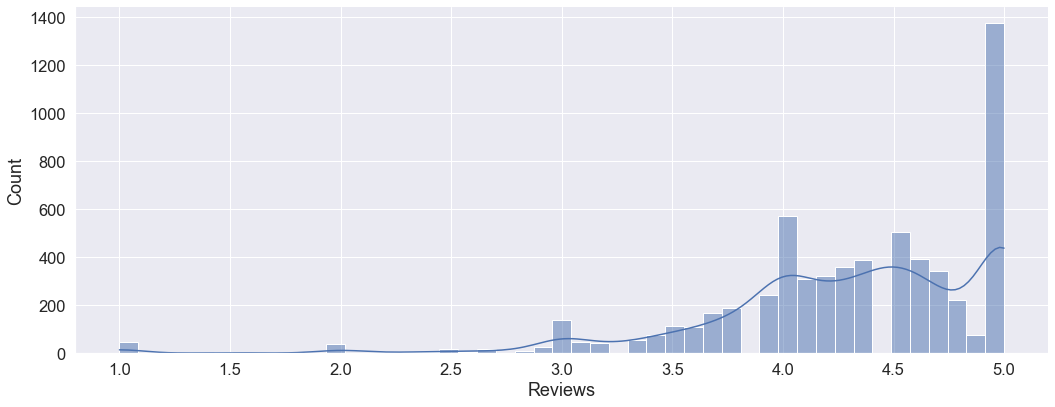

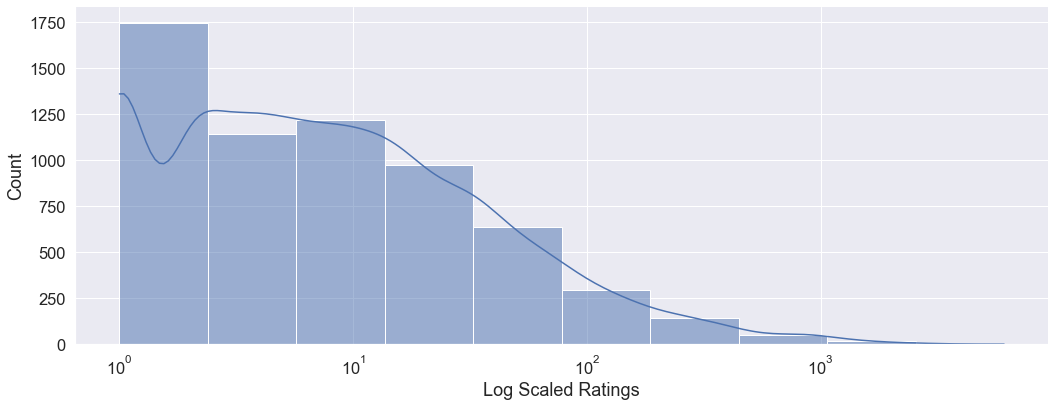

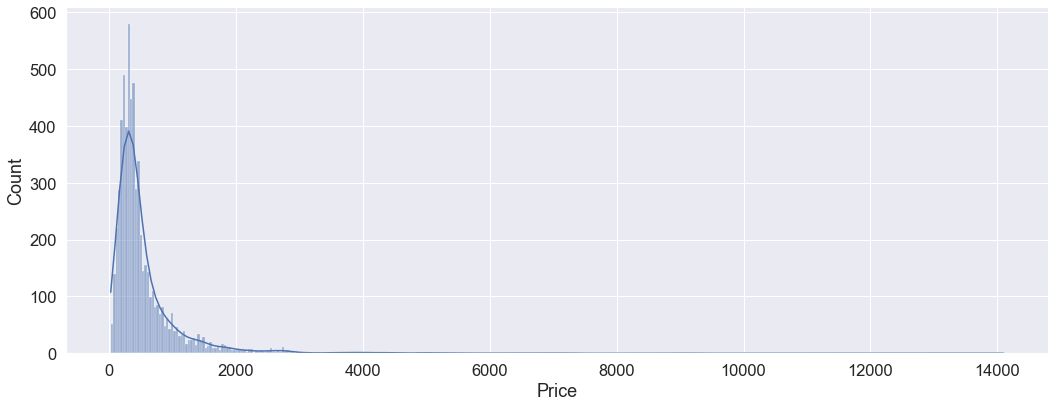

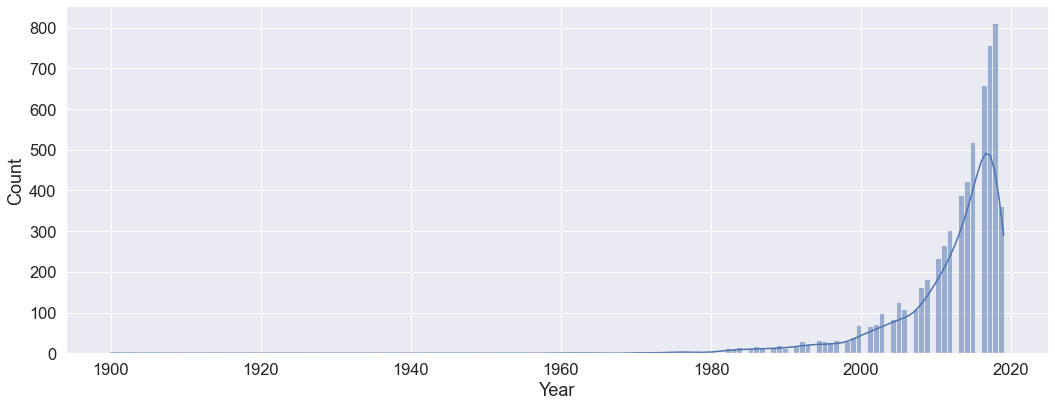

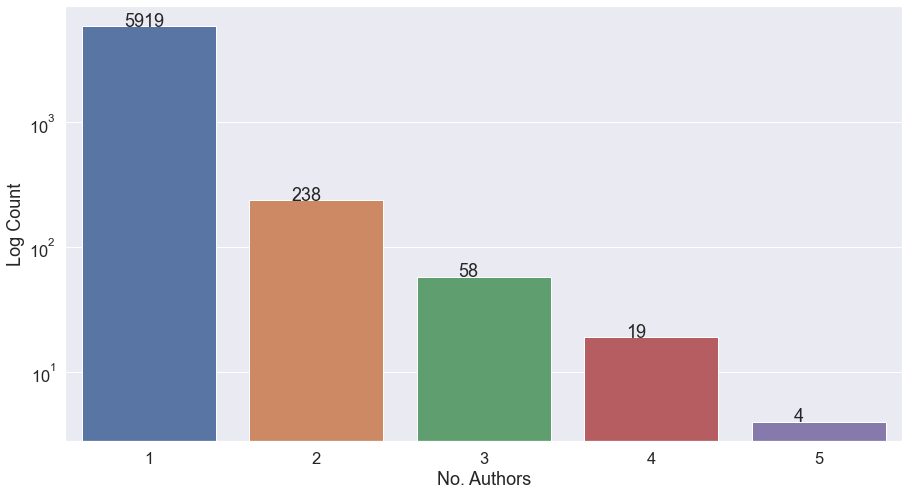

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(15, 8)})
sns.set(font_scale=1.5)

# Histograms
sns.displot(data=preprossed_data_df, x="Reviews", kde=True, height=6,aspect=2.5)
ax=sns.displot(data=preprossed_data_df, x="Ratings", bins=10, kde=True, log_scale=True,height=6,aspect=2.5)
ax.set(xlabel='Log Scaled Ratings', ylabel='Count')
sns.displot(data=preprossed_data_df, x="Price", kde=True,height=6,aspect=2.5) #chi-squared distribution
sns.displot(data=preprossed_data_df, x="Year", kde=True,height=6,aspect=2.5)

plt.show()
# Barplot No. Authors counts
ax = sns.countplot(data=preprossed_data_df, x="No. Authors")
ax.set_yscale("log")
ax.set(ylabel='Log Count')

for p in ax.patches:
   ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()


### Boxplot for numerical features


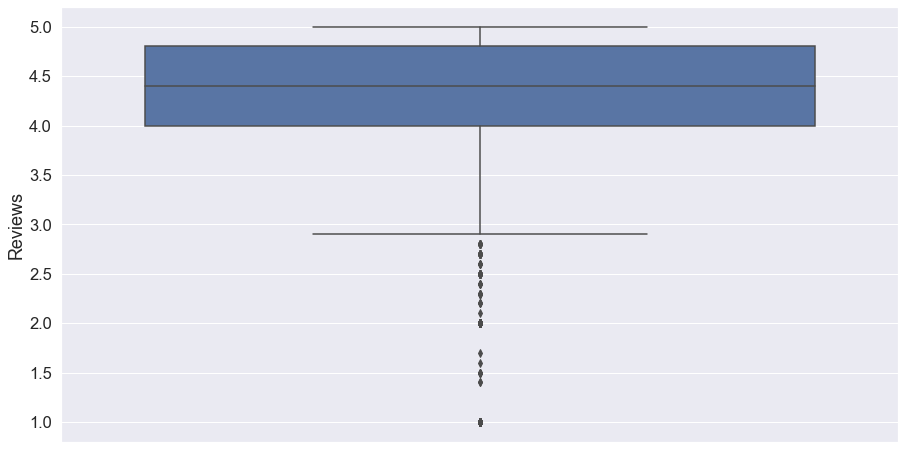

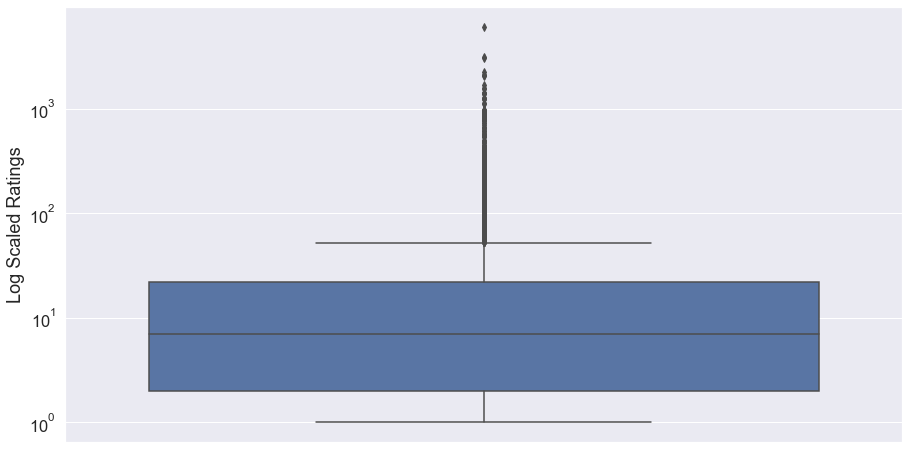

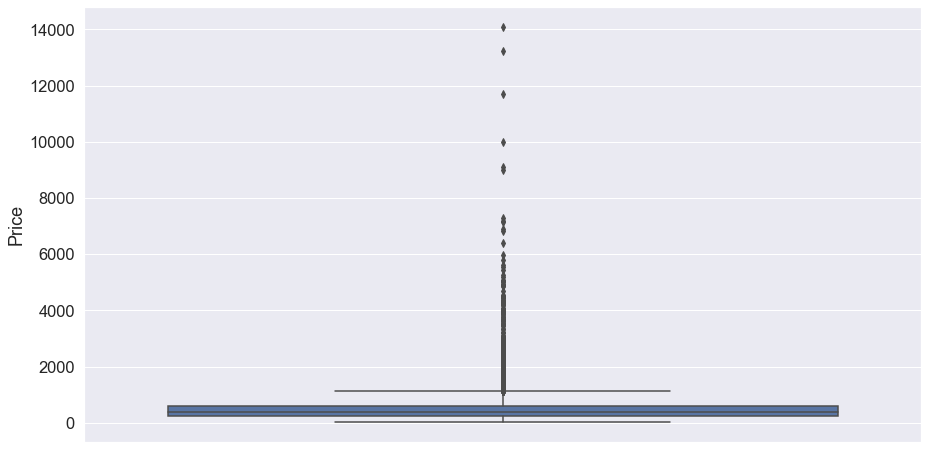

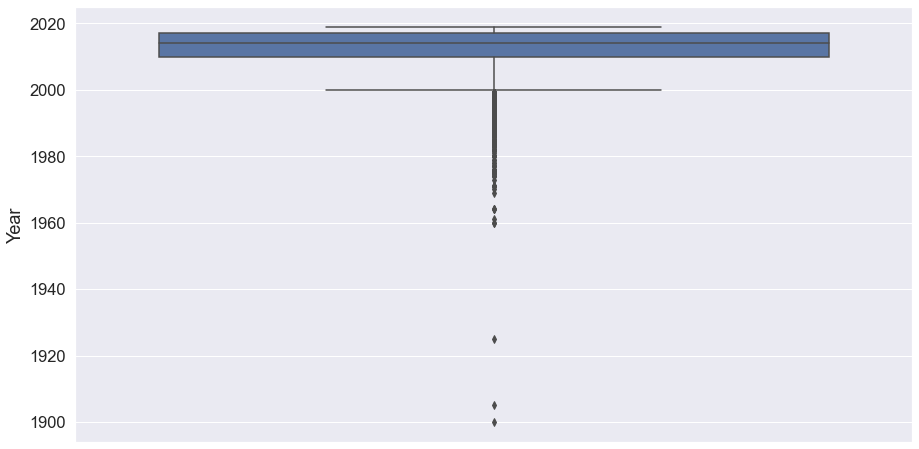

In [4]:
#boxplots
g=sns.boxplot(data=preprossed_data_df, y='Reviews')
plt.show()
g=sns.boxplot(data=preprossed_data_df, y='Ratings')
g.set(yscale='log')
g.set(ylabel='Log Scaled Ratings')
plt.show()
g=sns.boxplot(data=preprossed_data_df, y='Price')
plt.show()
g=sns.boxplot(data=preprossed_data_df, y='Year')
plt.show()


### Boxplot between Price and  Month

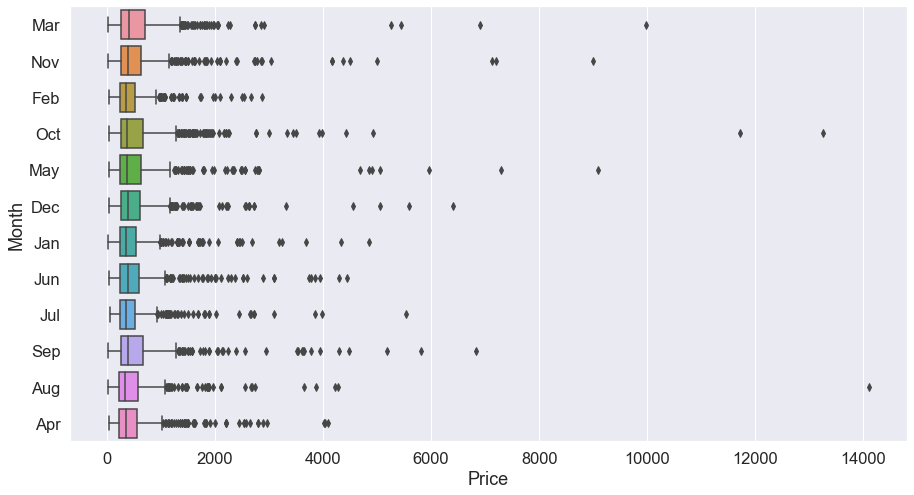

In [5]:
g=sns.boxplot(data=preprossed_data_df,x="Price",y='Month')
#g.set(xscale='log')
plt.show()

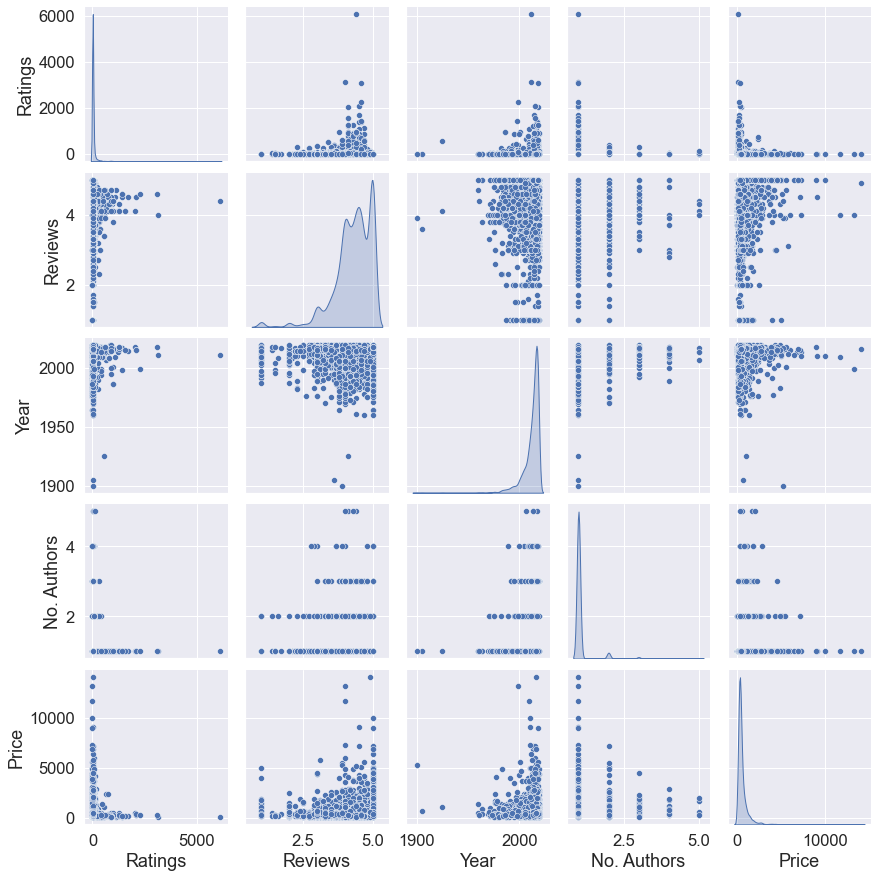

In [6]:
numerical_df= preprossed_data_df[['Ratings', 'Reviews','Year','No. Authors','Price']]
#create pairs plot for all numeric variables
sns.pairplot(numerical_df, diag_kind= 'kde')

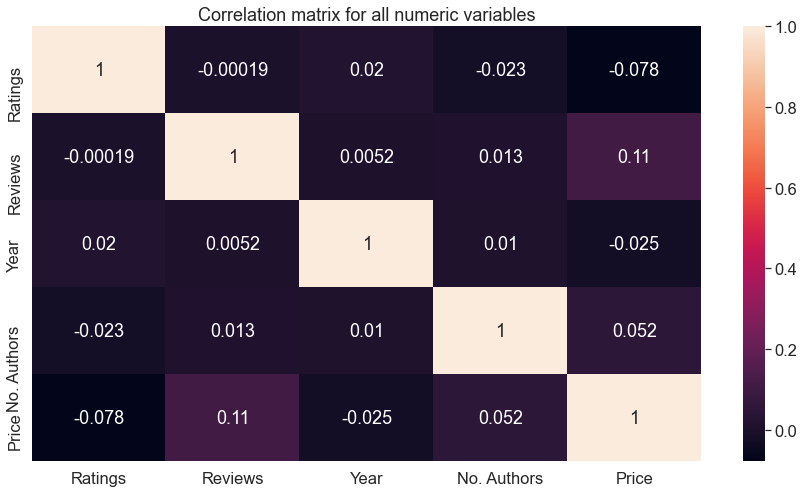

In [7]:
hm=sns.heatmap(data=numerical_df.corr(),annot = True)
hm.set( title = "Correlation matrix for all numeric variables")
sns.set(rc={'figure.figsize':(15, 8)})
sns.set(font_scale=1.5)

plt.show()

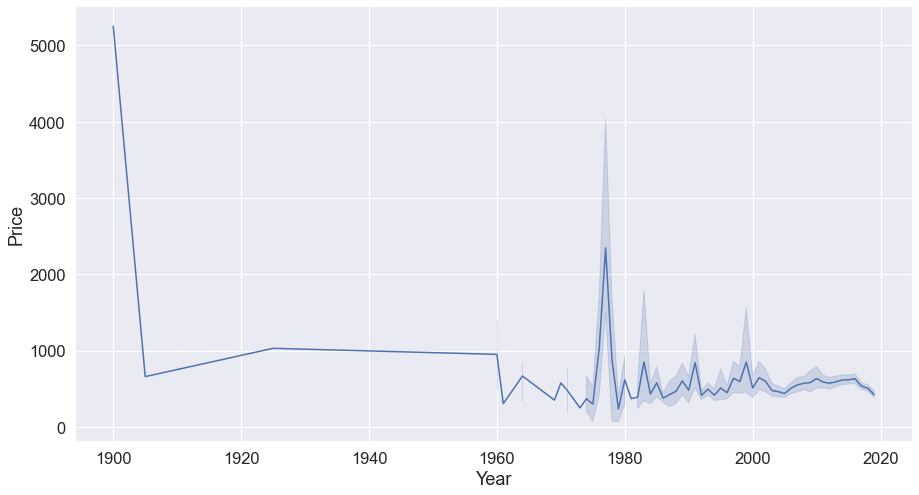

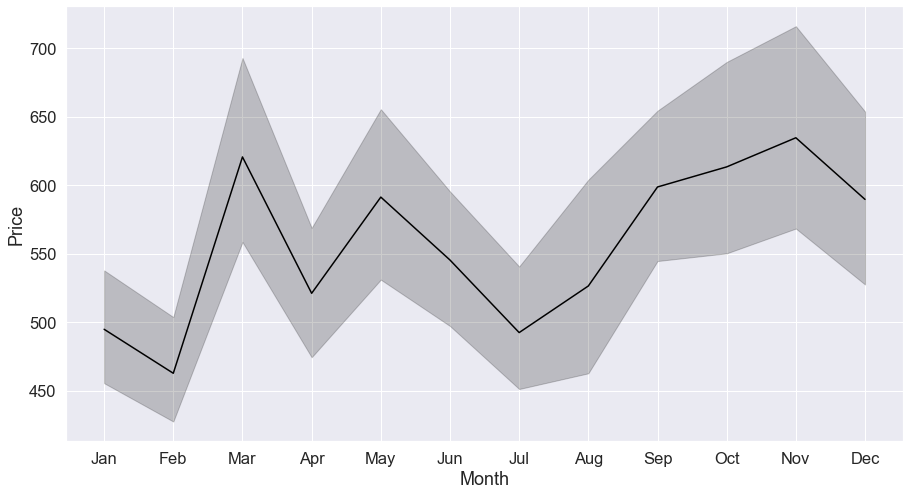

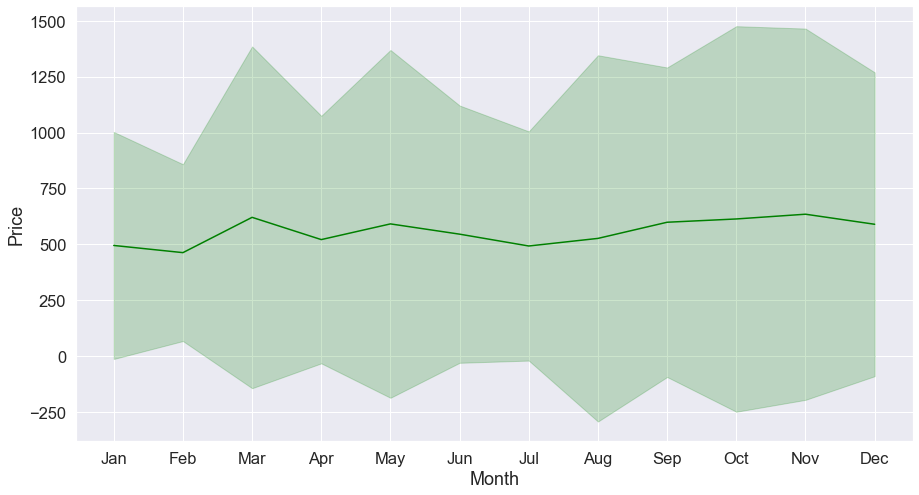

In [8]:
import matplotlib.pyplot as plt
#More complex datasets will have multiple measurements for the same value of the x variable. 
#The default behavior in seaborn is to aggregate the multiple measurements at each x value by plotting 
#the mean and the 95% confidence interval around the mean:
sns.lineplot(data=preprossed_data_df, x = "Year" , y ="Price")
plt.show()


#order months
months = ['Jan', 'Feb', 'Mar', 'Apr','May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
preprossed_data_df['Month'] = pd.Categorical(preprossed_data_df['Month'], ordered=True, categories = months)
sns.lineplot(x="Month",y="Price",data = preprossed_data_df,color="BLACK")
plt.show()
#Another good option, especially with larger data, is to represent the spread of the 
#distribution at each timepoint by plotting the standard deviation instead of a confidence interval:
sns.lineplot(x="Month", y="Price", ci="sd", data=preprossed_data_df,color="GREEN");
plt.show()


### Barplots between Price and Categorical Features

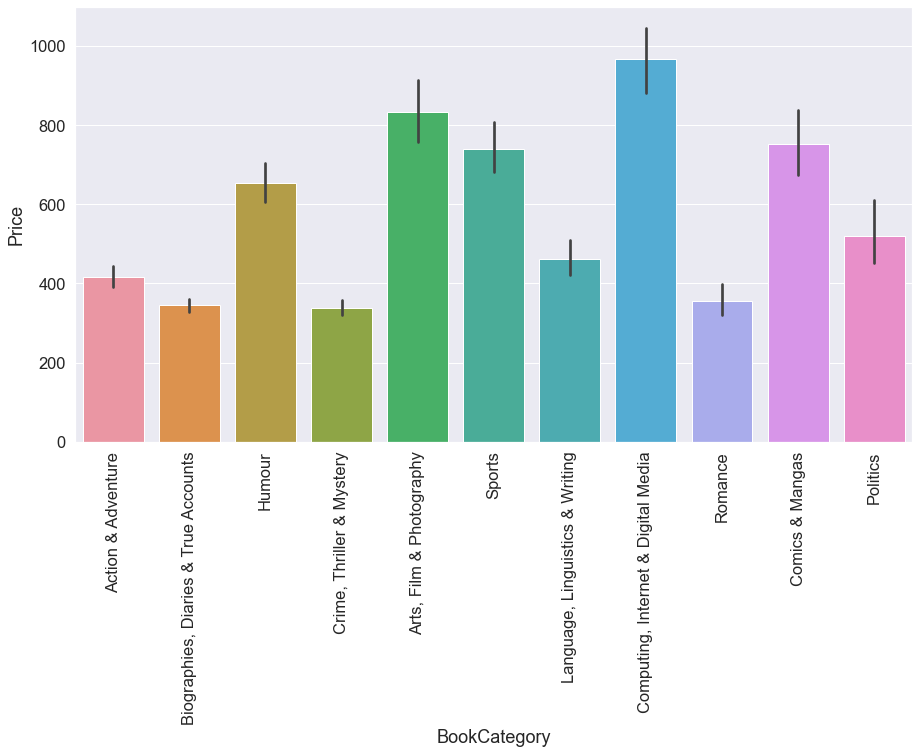

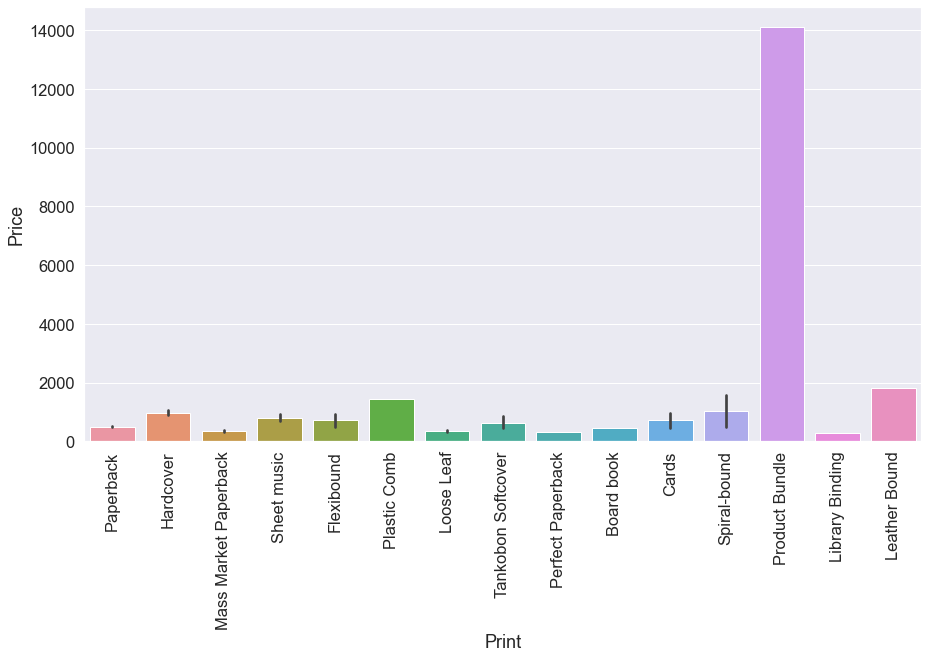

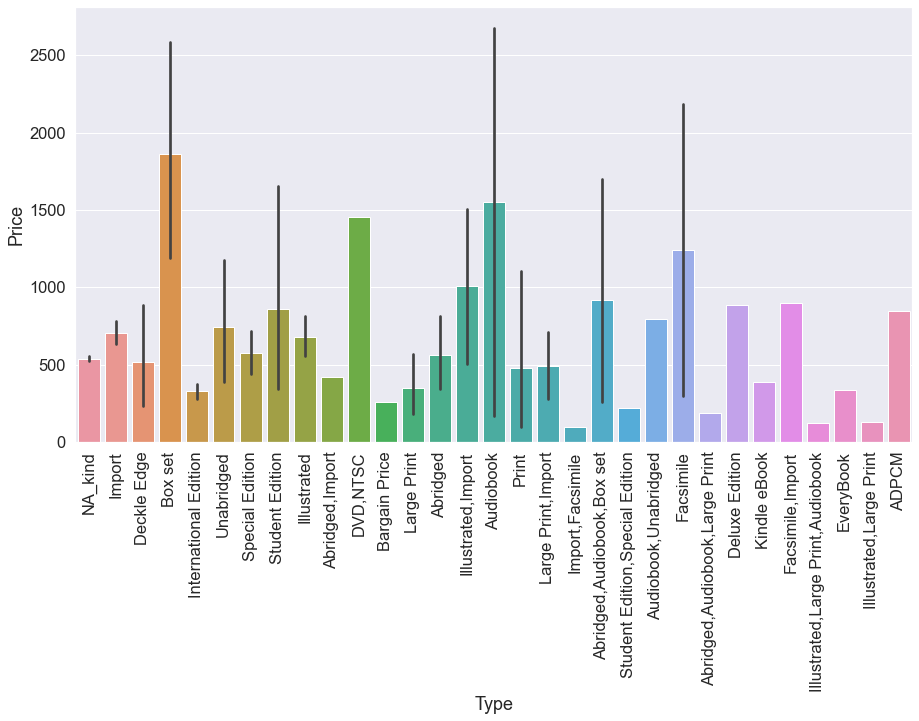

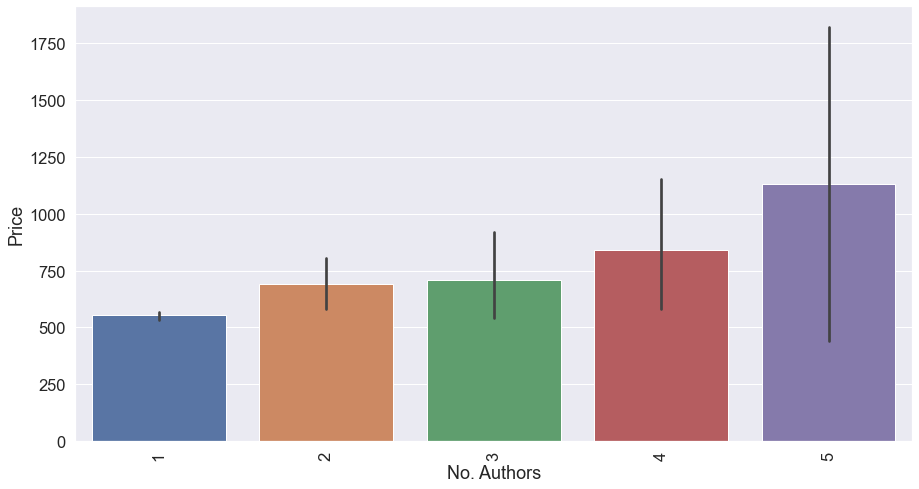

In [9]:
##Barplot between Months and Price
##Barplot between BookCategory and Price
##Barplot between Print and Price
##Barplot between Type and Price
##Barplot between Authors and Price
##Barplot between No. Authors and Price


sns.barplot(data=preprossed_data_df, x="BookCategory",y='Price')
plt.xticks(rotation=90)
plt.show()
sns.barplot(data=preprossed_data_df, x="Print",y='Price')
plt.xticks(rotation=90)
plt.show()
sns.barplot(data=preprossed_data_df, x="Type",y='Price')
plt.xticks(rotation=90)
plt.show()
sns.barplot(data=preprossed_data_df, x="No. Authors", y='Price')
plt.xticks(rotation=90)
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


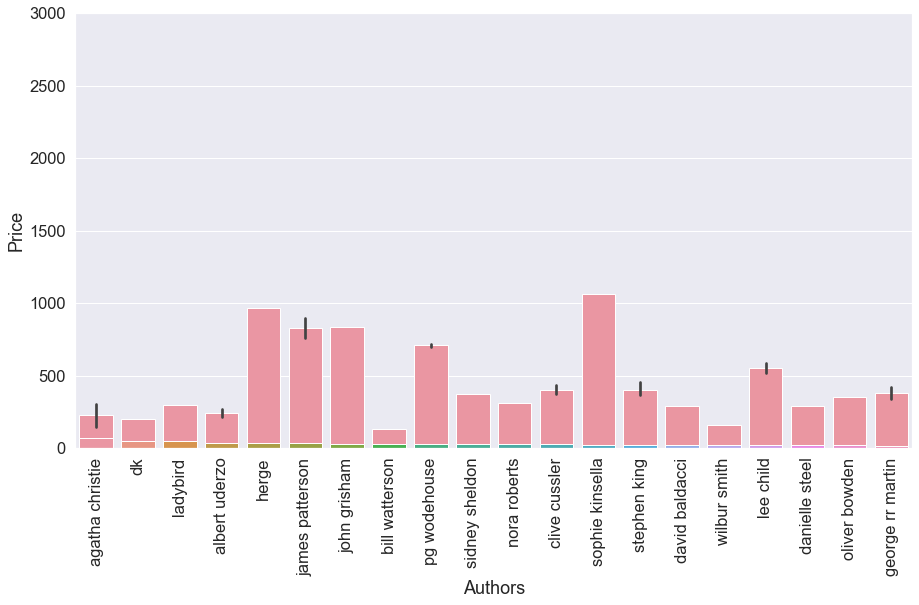

In [10]:
sns.barplot(data=preprossed_data_df, x="Authors",y='Price')
plt.xticks(rotation=90)
sns.countplot(preprossed_data_df["Authors"], order=pd.value_counts(preprossed_data_df["Authors"]).iloc[:20].index)
plt.ylim(0, 3000)
plt.ylabel("Price")
plt.show()
